In [1]:
import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

1. memanggil dataset ke variable

In [2]:
testing_letter = pd.read_csv('emnist-bymerge-test.csv')
training_letter = pd.read_csv('emnist-bymerge-train.csv')

In [3]:
print(training_letter.shape)
print(testing_letter.shape)

(697931, 785)
(116322, 785)


In [4]:
y1 = np.array(training_letter.iloc[:,0].values)  # Labels
x1 = np.array(training_letter.iloc[:,1:].values) # Images
y2 = np.array(testing_letter.iloc[:,0].values)   # Labels for test set
x2 = np.array(testing_letter.iloc[:,1:].values)  # Images for test set

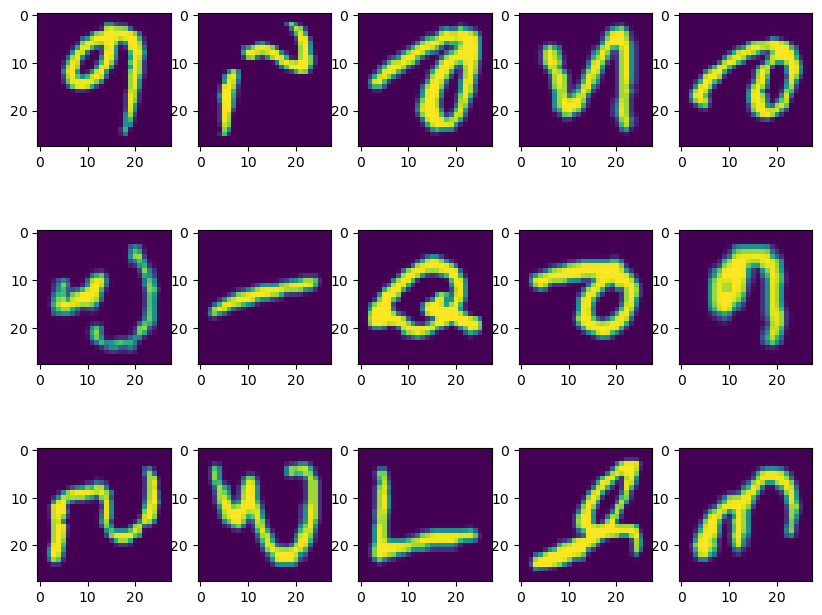

In [5]:
import matplotlib.pylab as plt
fig,axes = plt.subplots(3,5,figsize=(10,8))
for i, ax in enumerate(axes.flat):
    ax.imshow(x1[i].reshape([28,28]))

2. ekstraksi fitur hog ke setiap gambar

In [6]:
from skimage.feature import hog
x_training = []
for i in x1.reshape(-1,28,28):
    img, _ = hog(i, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True)
    x_training.append(img)



In [7]:
x_training = np.array(x_training)
y_training = np.array(y1)

In [8]:
x_testing = []
for i in x2.reshape(-1,28,28):
    img, _ = hog(i, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True)
    x_testing.append(img)



In [9]:
x_testing = np.array(x_testing)
y_testing = np.array(y2)

3. svm proses

In [10]:
from sklearn import svm
clf = svm.SVC()
clf.fit(x_training, y_training)
y_pred = clf.predict(x_testing)


4. sample test

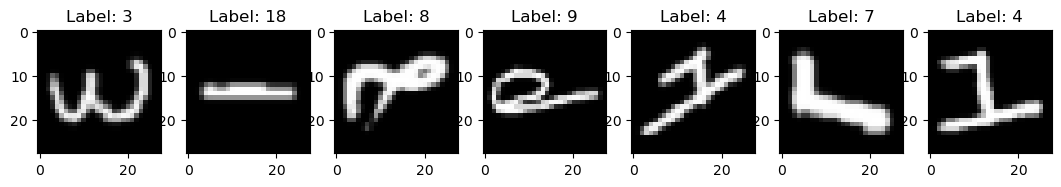

In [11]:
import random
def sampletest():
    random_indices = random.sample(range(len(x2)), 7)

    plt.figure(figsize=(15, 3))
    for i, index in enumerate(random_indices, 1):
        plt.subplot(1, 8, i)
        plt.imshow(x2[index].reshape(28, 28), cmap='gray')
        plt.title(f"Label: {y_testing[index]}")

    plt.show()

sampletest()

5. evaluasi model ( confusion matrix, precision, accuracy)

In [20]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '45', '46']

a. confusion matrix

In [30]:
from sklearn.metrics import confusion_matrix
import random
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
conf_mat = confusion_matrix(y_testing,y_pred)
conf_mat

array([[4595,    2,    2, ...,    0,    0,    0],
       [   1, 6094,    6, ...,    0,    4,    6],
       [   5,    1, 5571, ...,    1,    0,    0],
       ...,
       [   0,    1,    1, ...,  124,    1,    3],
       [   0,    4,    1, ...,    0, 2232,   11],
       [   2,    6,    2, ...,    0,    6, 2744]], dtype=int64)

In [33]:
fig, ax = plot_confusion_matrix(conf_mat=conf_mat, class_names=class_names)

AssertionError: len(class_names) should be equal to number ofclasses in the dataset

b. precision

In [23]:
precision = precision_score(y_testing, y_pred, average=None)
precision

c:\Users\thoma\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


array([0.6727672 , 0.64228499, 0.94120628, 0.97612144, 0.94809379,
       0.94034813, 0.94643759, 0.9729547 , 0.93504274, 0.90094957,
       0.87220733, 0.89198606, 0.91709845, 0.87780899, 0.89354067,
       0.73692722, 0.83286908, 0.93584906, 0.69179735, 0.92244418,
       0.93695921, 0.80682839, 0.96124426, 0.92034139, 0.69761776,
       0.94653911, 0.83246073, 0.88981043, 0.87415295, 0.91009174,
       0.92619784, 0.90953947, 0.9630845 , 0.96670494, 0.89583333,
       0.85542169, 0.88581952, 0.87831325, 0.96462264, 0.94354644,
       0.        , 0.75      , 0.91315789, 0.91826923, 0.77987421,
       0.94576271, 0.91284098])

c. accuracy

In [50]:
accuracy = accuracy_score(y_testing, y_pred)
accuracy

0.9837983798379838